**connectivity** analysis 
check out [link](https://mne.tools/dev/auto_tutorials/epochs/60_make_fixed_length_epochs.html)

In [1]:
import glob
import os
from src.analysis import *
from tqdm import tqdm
from mne_connectivity import envelope_correlation
import seaborn
import mne

In [2]:
files = sorted(glob.glob("../data/epochs_all/*_jhana*"))
#epochs_jhana = mne.read_epochs(files[0])
epochs_ar_jhana = mne.read_epochs(files[1])
eventsv_jhana = np.load(files[2])
eventsv_ar_jhana = np.load(files[3])
reject_log_jhana = np.load(files[4])

files = sorted(glob.glob("../data/epochs_all/*_mindfulness*"))
#epochs_mindfulness = mne.read_epochs(files[0])
epochs_ar_mindfulness = mne.read_epochs(files[1])
eventsv_mindfulness = np.load(files[2])
eventsv_ar_mindfulness = np.load(files[3])
reject_log_mindfulness = np.load(files[4])

Reading /Users/jonasmago/PhD_code_data/github/jhana/notebooks/../data/epochs_all/epochs_ar_clean_jhana.fif ...


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_95062/1251704332.py:3: RuntimeWarning: This filename (../data/epochs_all/epochs_ar_clean_jhana.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_ar_jhana = mne.read_epochs(files[1])


    Found the data of interest:
        t =       0.00 ...    9996.09 ms
        0 CTF compensation matrices available
Not setting metadata
5040 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/github/jhana/notebooks/../data/epochs_all/epochs_ar_clean_mindfulness.fif ...


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_95062/1251704332.py:10: RuntimeWarning: This filename (../data/epochs_all/epochs_ar_clean_mindfulness.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_ar_mindfulness = mne.read_epochs(files[1])


    Found the data of interest:
        t =       0.00 ...    9996.09 ms
        0 CTF compensation matrices available
Not setting metadata
4996 matching events found
No baseline correction applied
0 projection items activated


In [6]:
eventsv_ar_jhana.shape

(5040,)

In [5]:
def run_connectome_analysis(epochs1, epochs2, name1, name2):
    
    c1_data = epochs1.get_data()
    c2_data = epochs2.get_data()
    print ("compute connectome 1")
    c1 =compute_connectome(c1_data)
    print ("compute connectome 2")
    c2 =compute_connectome(c2_data)

    plot_connectomes([c1, c2],[name1, name2])
    plot_connectomes([c1],[name1])
    plot_connectomes([c2],[name2])

    print ("compare both groups")
    # Compare the two groups
    measures = ['avg_shortest_path_length', 'avg_strength', 'std_strength', 'avg_betweenness', 
                'std_betweenness', 'avg_closeness', 'std_closeness', 'avg_clustering', 'std_clustering']
    compare_groups(c1, c2, measures, name1, name2)


    graph_summary = compute_graph_summary(c1)
    print("")
    print (f"{name1} graph summary")
    print_graph_summary(graph_summary)

    graph_summary = compute_graph_summary(c2)
    print("")
    print (f"{name2} graph summary")
    print_graph_summary(graph_summary)


compute connectome 1
compute connectome 2
compare both groups


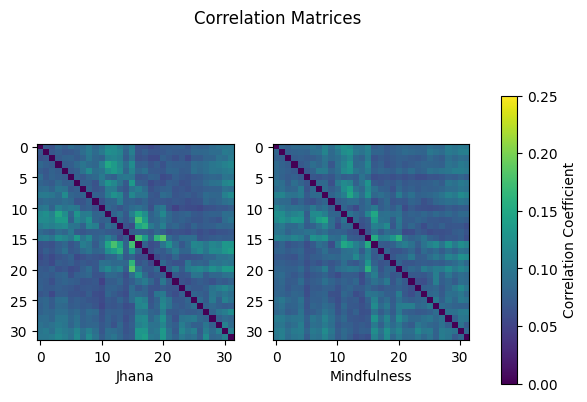

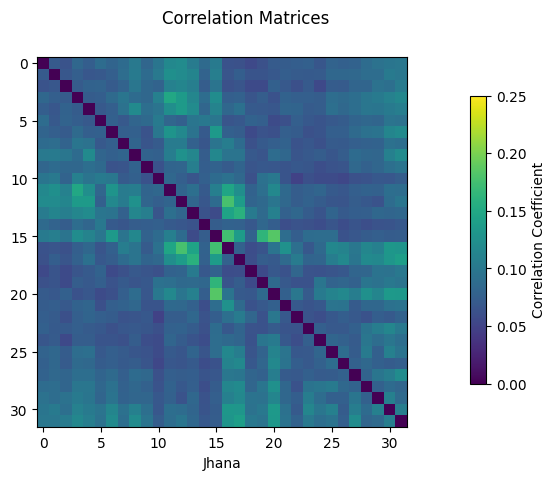

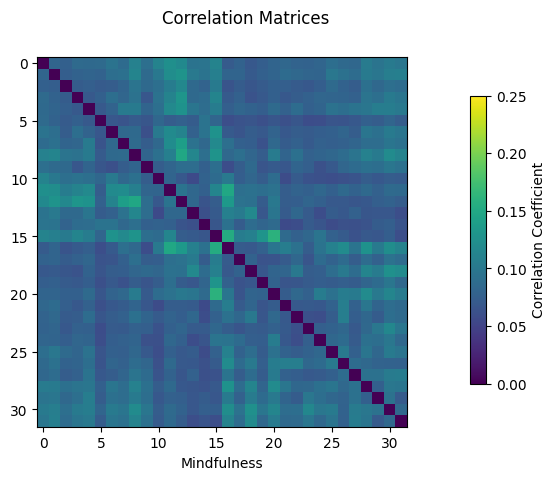

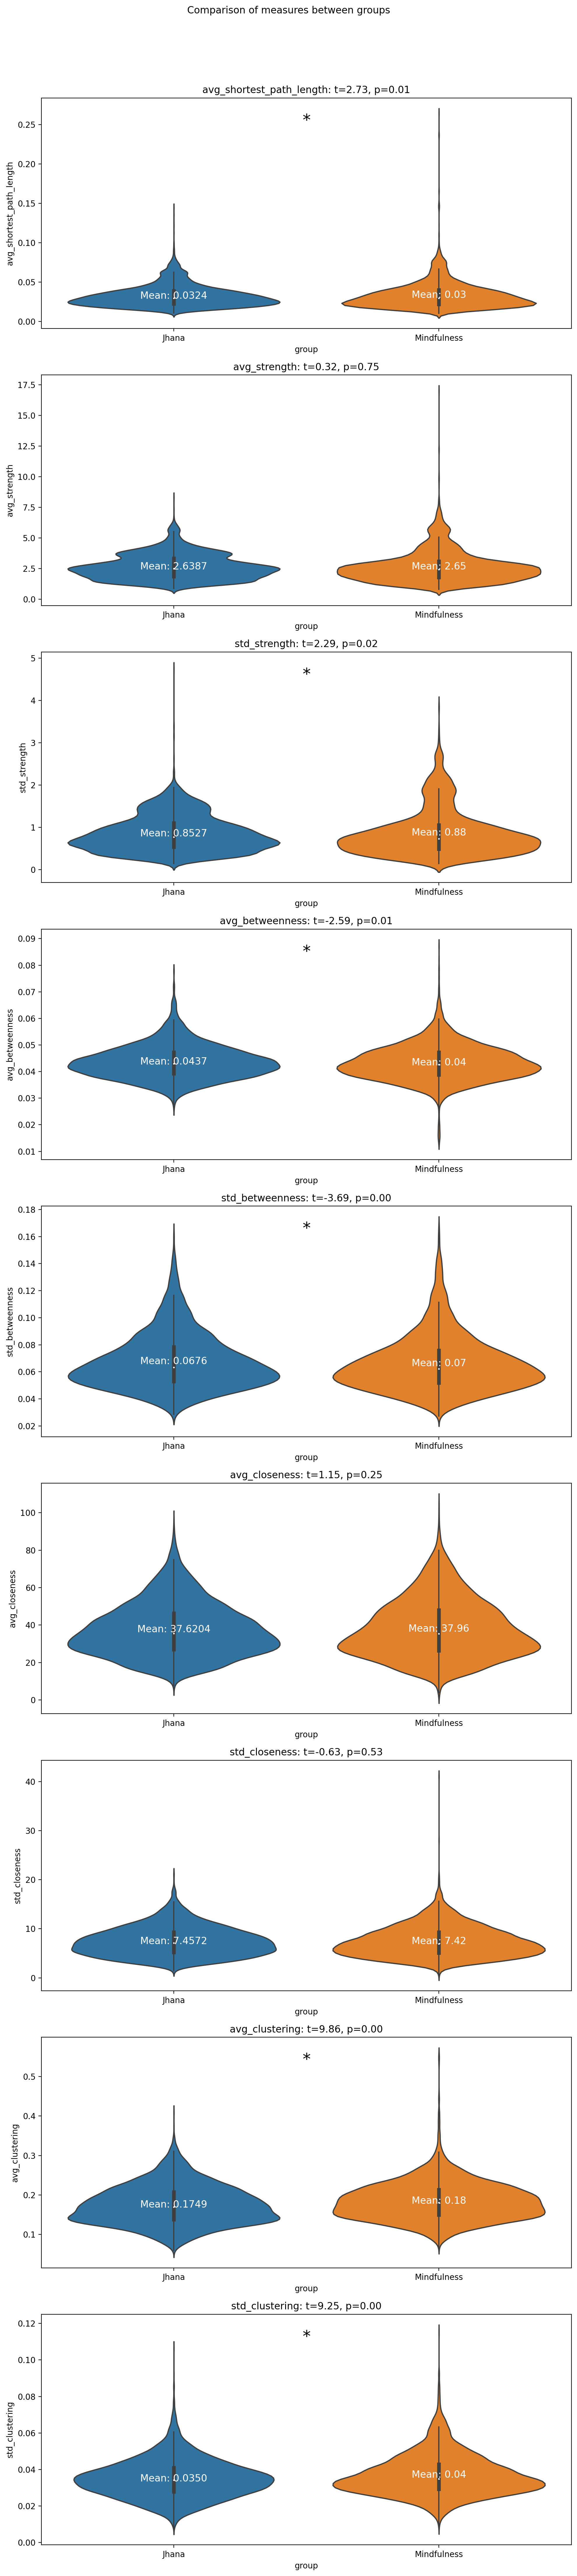


Jhana graph summary
avg_shortest_path_length: 0.08
avg_strength: 2.64
std_strength: 0.26
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 11.91
std_closeness: 1.14
avg_clustering: 0.46
std_clustering: 0.03

Mindfulness graph summary
avg_shortest_path_length: 0.09
avg_strength: 2.65
std_strength: 0.22
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 11.80
std_closeness: 0.95
avg_clustering: 0.52
std_clustering: 0.03


In [6]:
run_connectome_analysis(
    epochs_ar_jhana, 
    epochs_ar_mindfulness, 
    "Jhana", 
    "Mindfulness",
)

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 161280 out of 161280 | elapsed:   26.7s finished


Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 159872 out of 159872 | elapsed:   25.5s finished


compute connectome 1
compute connectome 2
compare both groups


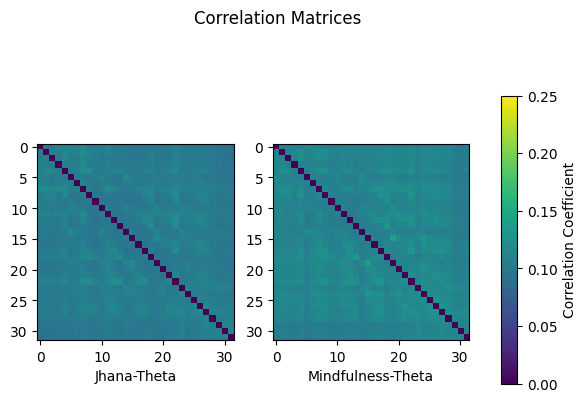

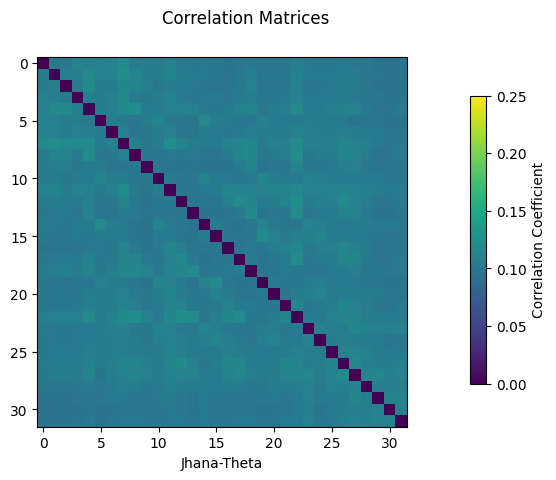

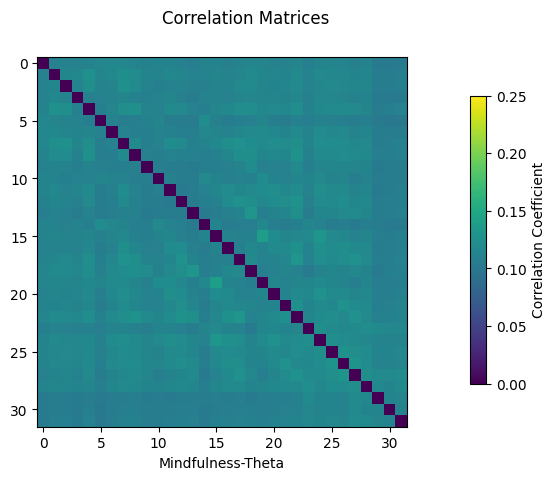

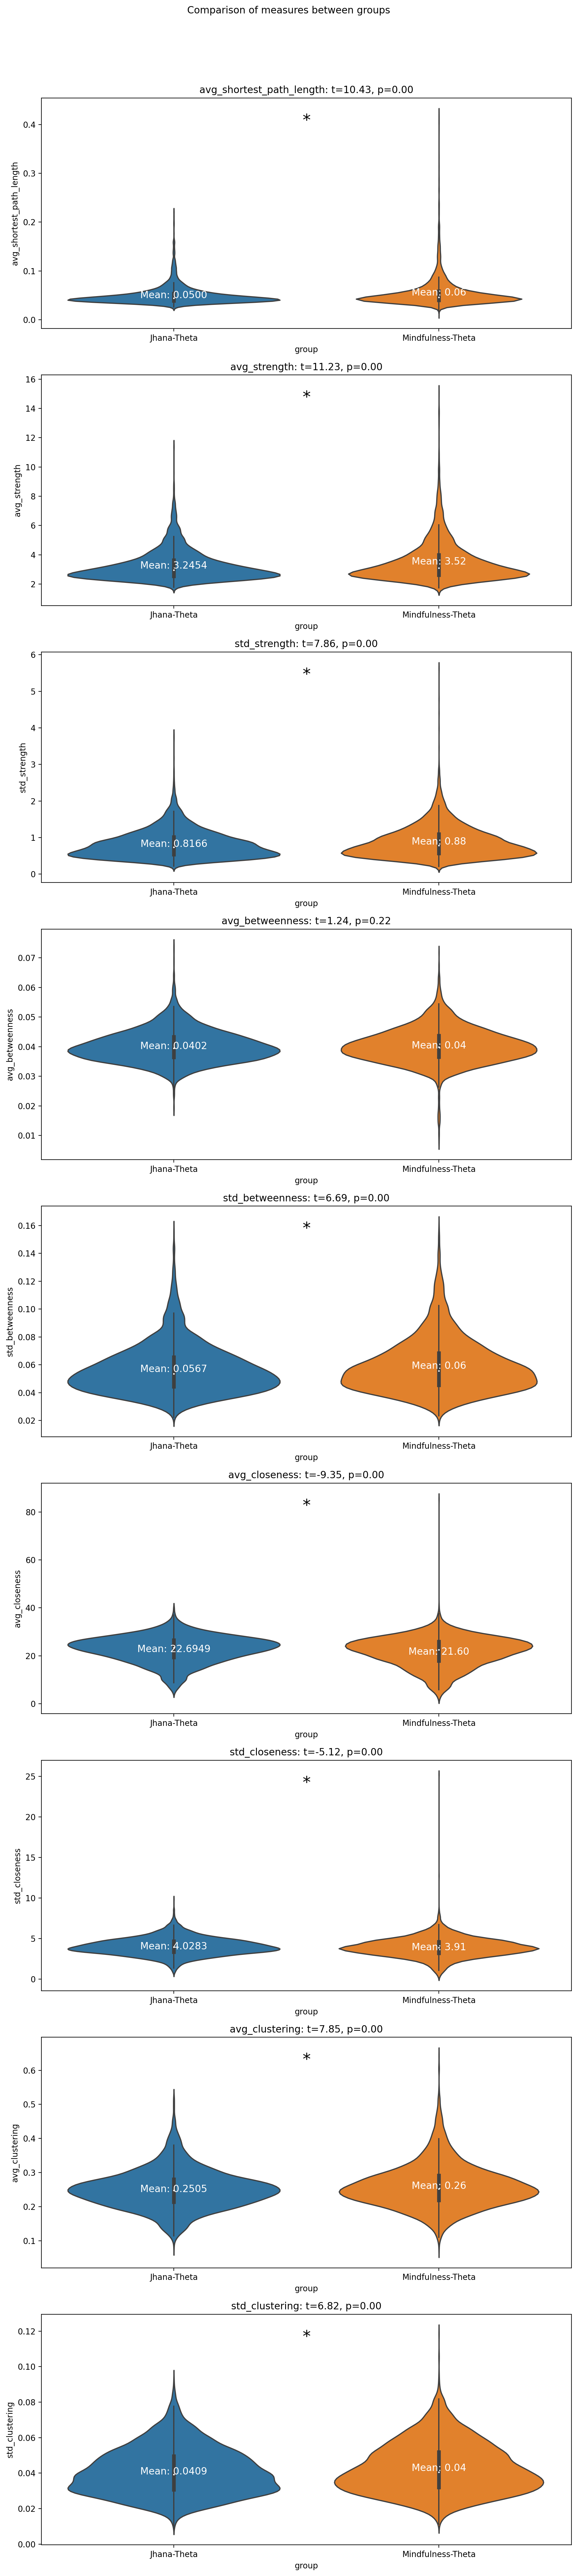


Jhana-Theta graph summary
avg_shortest_path_length: 0.10
avg_strength: 3.25
std_strength: 0.07
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 9.56
std_closeness: 0.21
avg_clustering: 0.84
std_clustering: 0.01

Mindfulness-Theta graph summary
avg_shortest_path_length: 0.11
avg_strength: 3.52
std_strength: 0.09
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 8.82
std_closeness: 0.23
avg_clustering: 0.81
std_clustering: 0.01


In [7]:
l_freq=4
h_freq=8

theta_jhana = epochs_ar_jhana.copy()
theta_mindfulness = epochs_ar_mindfulness.copy()

theta_jhana.filter(l_freq=l_freq, h_freq=h_freq)
theta_mindfulness.filter(l_freq=l_freq, h_freq=h_freq)

run_connectome_analysis(
    theta_jhana, 
    theta_mindfulness, 
    "Jhana-Theta", 
    "Mindfulness-Theta",
)

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 161280 out of 161280 | elapsed:   27.2s finished


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 159872 out of 159872 | elapsed:   26.0s finished


compute connectome 1
compute connectome 2
compare both groups


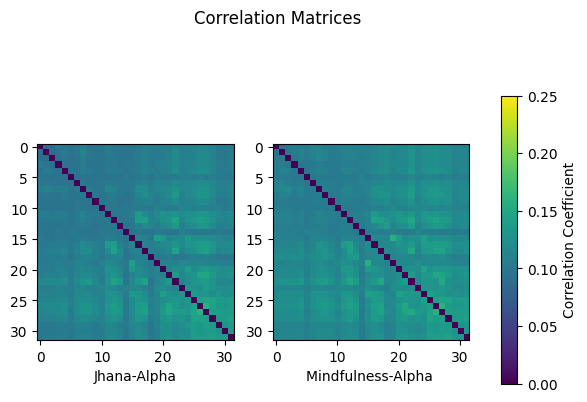

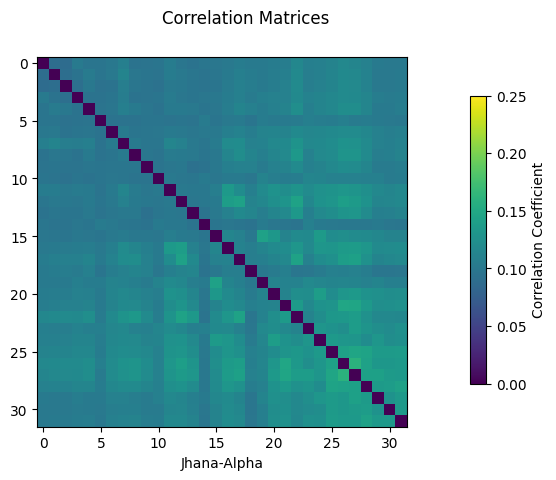

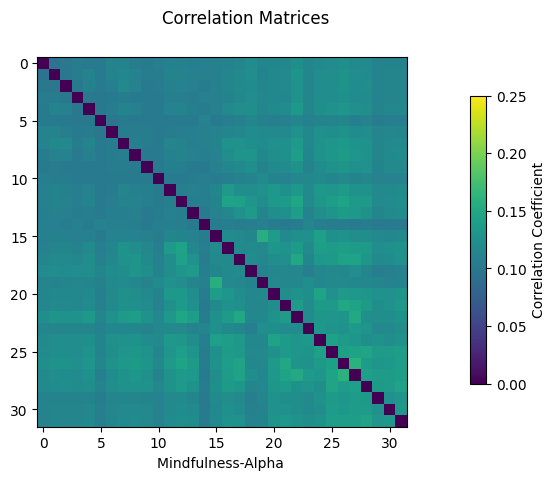

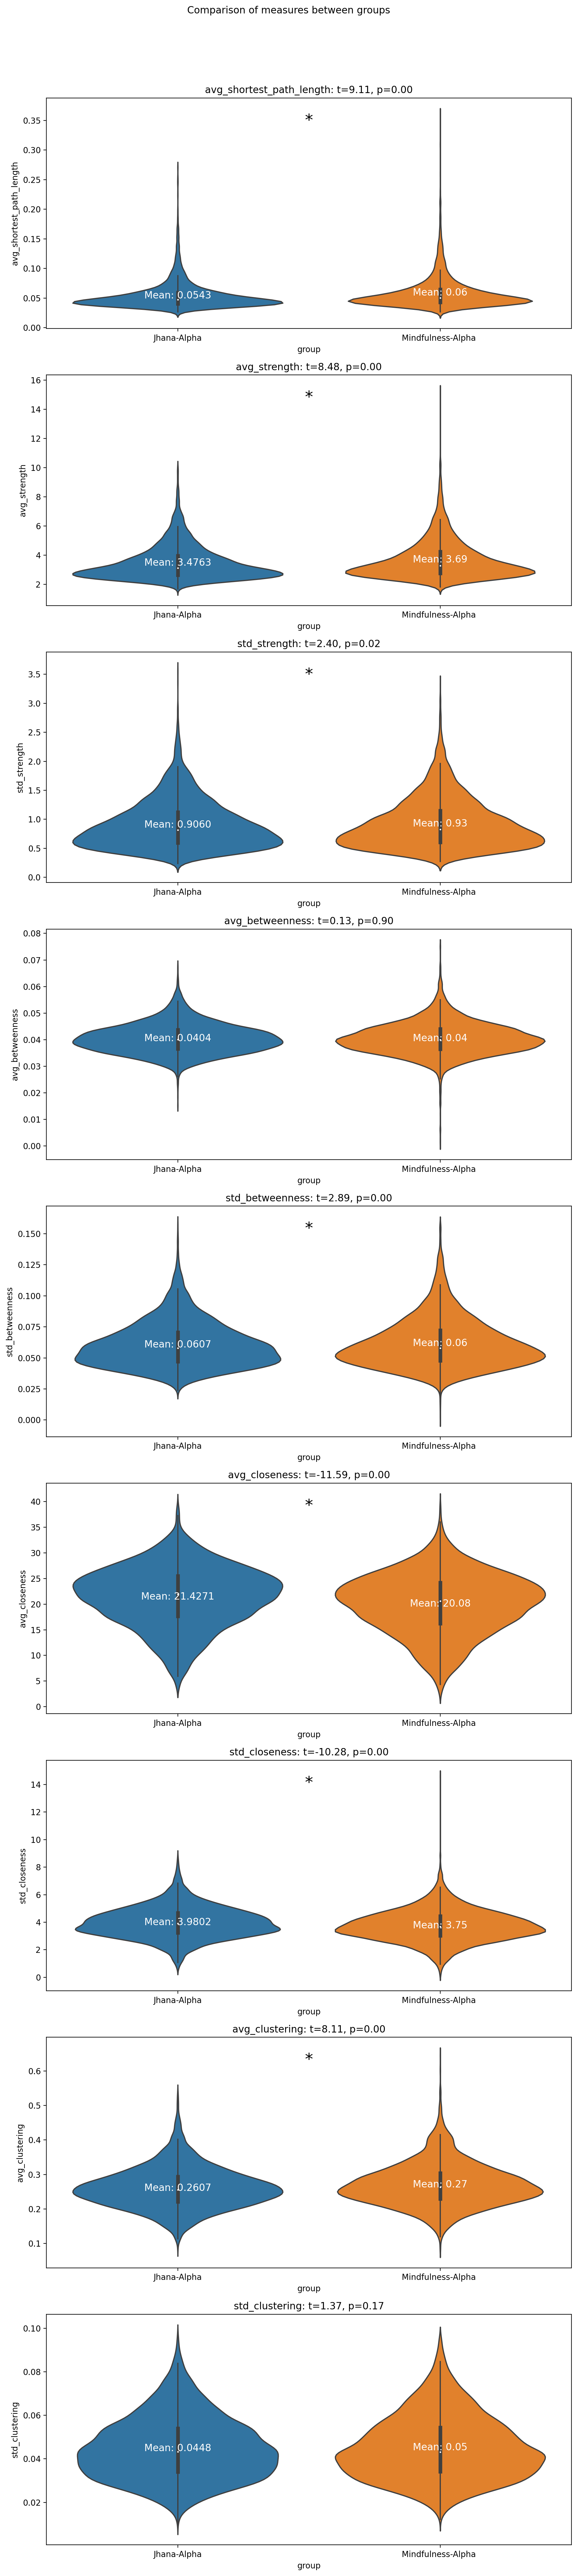


Jhana-Alpha graph summary
avg_shortest_path_length: 0.11
avg_strength: 3.48
std_strength: 0.24
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 8.96
std_closeness: 0.62
avg_clustering: 0.70
std_clustering: 0.03

Mindfulness-Alpha  graph summary
avg_shortest_path_length: 0.12
avg_strength: 3.69
std_strength: 0.21
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 8.43
std_closeness: 0.48
avg_clustering: 0.75
std_clustering: 0.03


In [8]:
l_freq=8
h_freq=13

alpha_jhana = epochs_ar_jhana.copy()
alpha_mindfulness = epochs_ar_mindfulness.copy()

alpha_jhana.filter(l_freq=l_freq, h_freq=h_freq)
alpha_mindfulness.filter(l_freq=l_freq, h_freq=h_freq)

run_connectome_analysis(
    alpha_jhana, 
    alpha_mindfulness, 
    "Jhana-Alpha", 
    "Mindfulness-Alpha ",
)

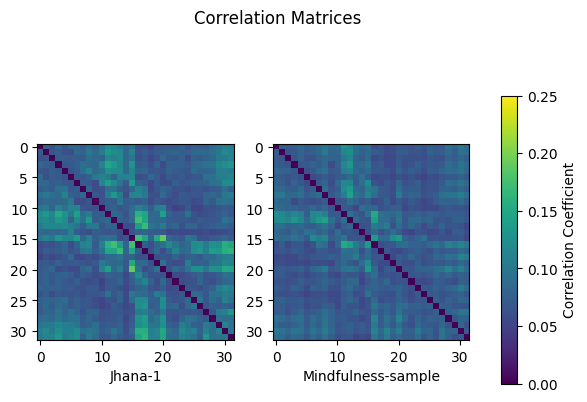

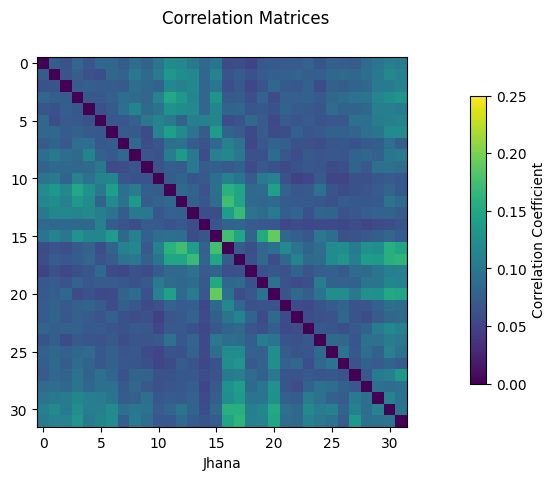

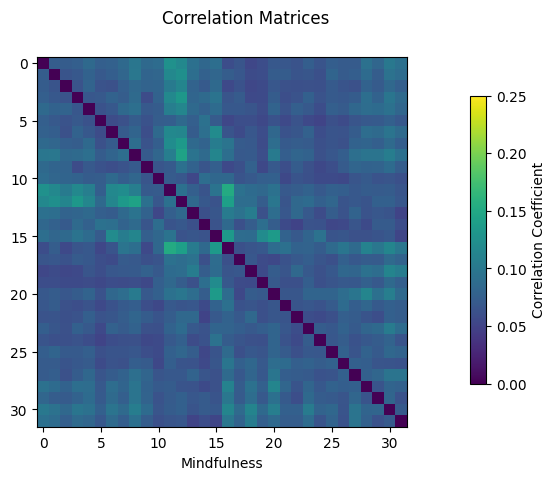

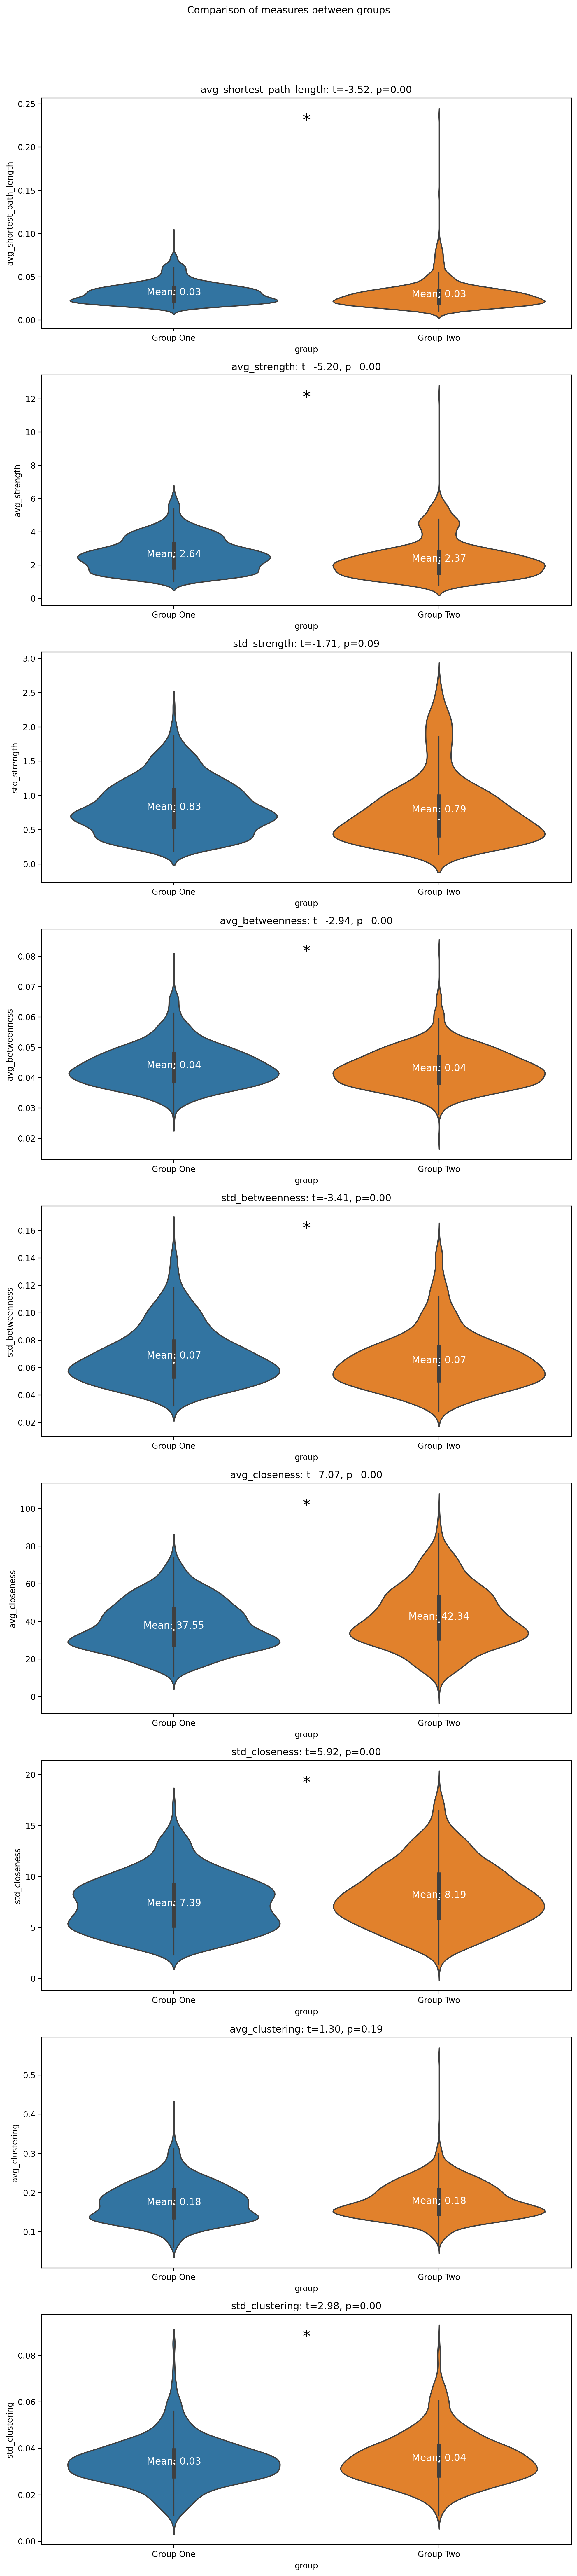


Jhana-1 graph summary
avg_shortest_path_length: 0.08
avg_strength: 2.64
std_strength: 0.31
avg_betweenness: 0.00
std_betweenness: 0.01
avg_closeness: 12.00
std_closeness: 1.27
avg_clustering: 0.44
std_clustering: 0.03

Mindfulness-sample graph summary
avg_shortest_path_length: 0.08
avg_strength: 2.37
std_strength: 0.21
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 13.19
std_closeness: 1.13
avg_clustering: 0.49
std_clustering: 0.03


In [20]:
# cropped to [:4996] as this is the number of epochs for the mindfulness condition
run_connectome_analysis(
    epochs_ar_jhana[:4996][eventsv_ar_jhana[:4996]==1], 
    epochs_ar_mindfulness[eventsv_ar_jhana[:4996]==1],
    "Jhana-1", 
    "Mindfulness-sample",
)

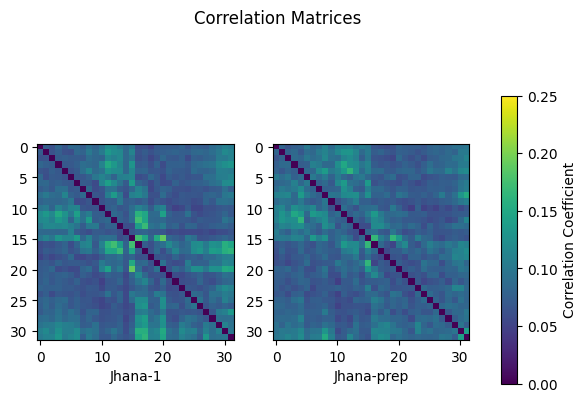

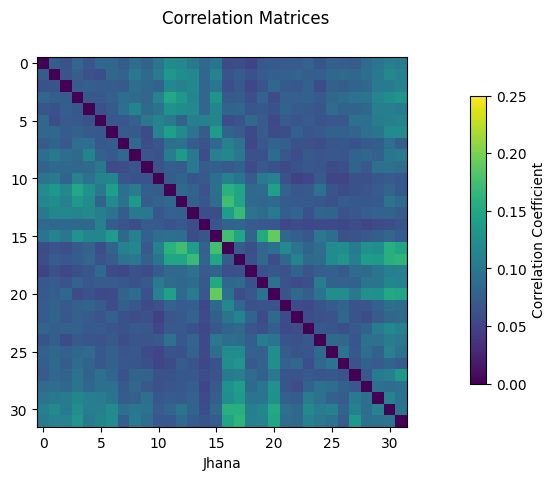

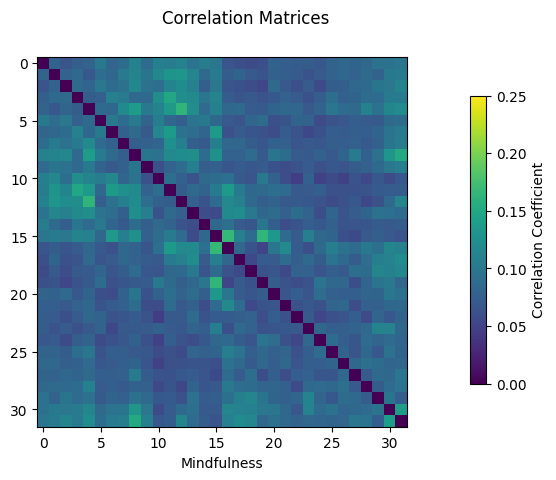

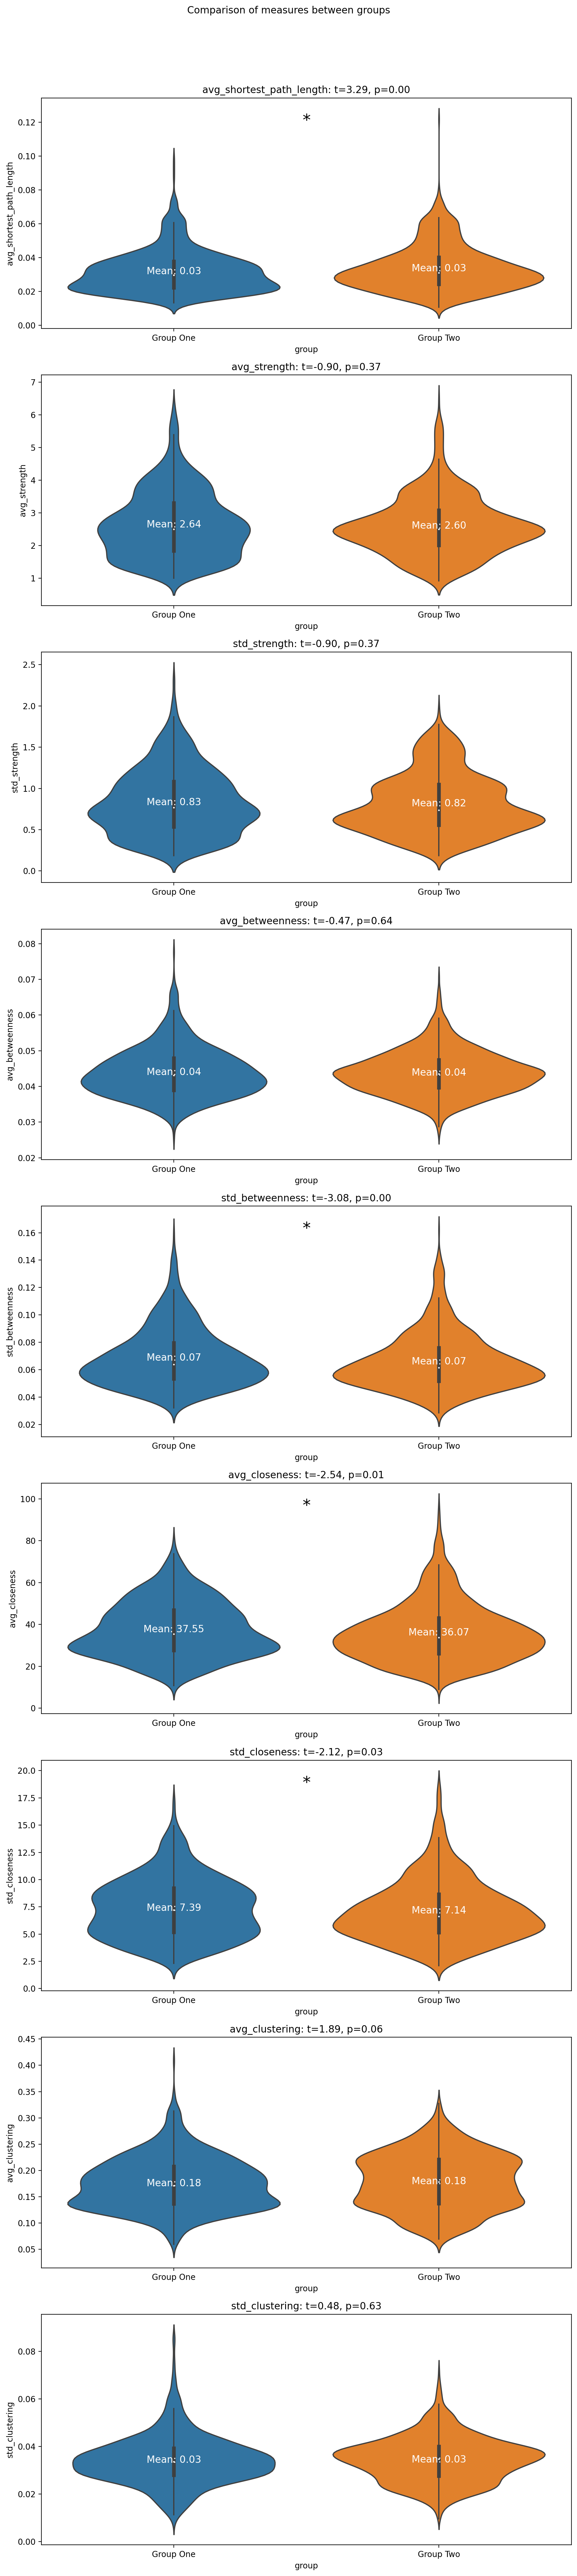


Jhana-1 graph summary
avg_shortest_path_length: 0.08
avg_strength: 2.64
std_strength: 0.31
avg_betweenness: 0.00
std_betweenness: 0.01
avg_closeness: 12.00
std_closeness: 1.27
avg_clustering: 0.44
std_clustering: 0.03

Jhana-prep graph summary
avg_shortest_path_length: 0.08
avg_strength: 2.60
std_strength: 0.23
avg_betweenness: 0.00
std_betweenness: 0.00
avg_closeness: 12.07
std_closeness: 1.05
avg_clustering: 0.50
std_clustering: 0.03


In [5]:
run_connectome_analysis(
    epochs_ar_jhana[eventsv_ar_jhana==1], 
    epochs_ar_jhana[eventsv_ar_jhana==0], 
    "Jhana-1", 
    "Jhana-prep",
)